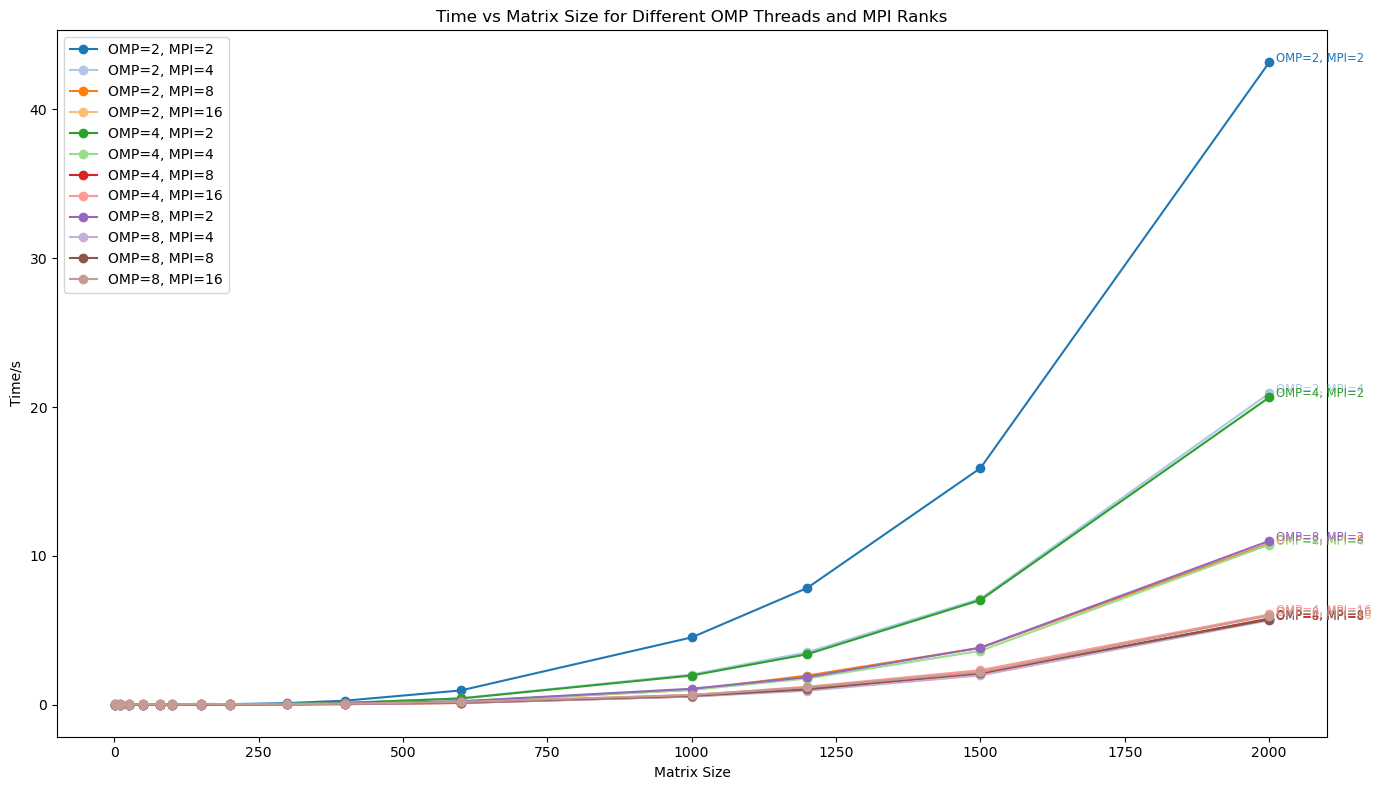

In [10]:
import numpy as np
import matplotlib.pyplot as plt

cmap = plt.get_cmap("tab20")
colors = cmap.colors

Ns = [1, 10, 25, 50, 80, 100, 150, 200, 300, 400, 600, 1000, 1200, 1500, 2000]
omp_threads = [2, 4, 8]
mpi_ranks = [2, 4, 8, 16]

plt.figure(figsize=(14, 8))

for i, omp in enumerate(omp_threads):
    for j, mpi in enumerate(mpi_ranks):
        csv_file_path = f"omp{omp}_mpi{mpi}.csv"
        try:
            times = np.loadtxt(csv_file_path, delimiter=',', skiprows=1)
            line, = plt.plot(Ns, times, marker='o', linestyle='-', color=colors[i*len(mpi_ranks) + j], label=f'OMP={omp}, MPI={mpi}')
            plt.annotate(f'OMP={omp}, MPI={mpi}', 
                         xy=(Ns[-1], times[-1]), 
                         xytext=(5, 0), 
                         textcoords='offset points',
                         color=line.get_color(),
                         size='small')
        except IOError:
            print(f"Could not read file: {csv_file_path}")

plt.xlabel('Matrix Size')
plt.ylabel('Time/s')
plt.title('Time vs Matrix Size for Different OMP Threads and MPI Ranks')
plt.legend()
plt.tight_layout()
plt.show()
